In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
Data = pd.read_csv("C:/Users/divya/Desktop/conestoga/predictive analytics/sem 2/programming statitsics for business/Group project/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Data Preprocessing
Data['TotalCharges'] = pd.to_numeric(Data['TotalCharges'], errors='coerce')
Data.dropna(inplace=True)
Data = Data.drop(['customerID'], axis=1)

In [4]:
# Encode Categorical Variables
LabelEncoders = {}
for Column in Data.select_dtypes(include=['object']).columns:
    Le = LabelEncoder()
    Data[Column] = Le.fit_transform(Data[Column])
    LabelEncoders[Column] = Le

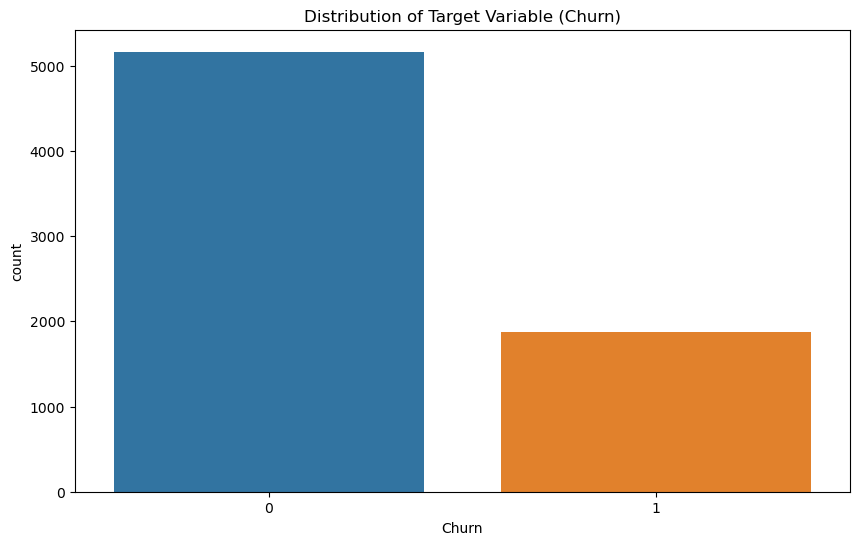

In [5]:
# EDA: Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=Data)
plt.title("Distribution of Target Variable (Churn)")
plt.show()

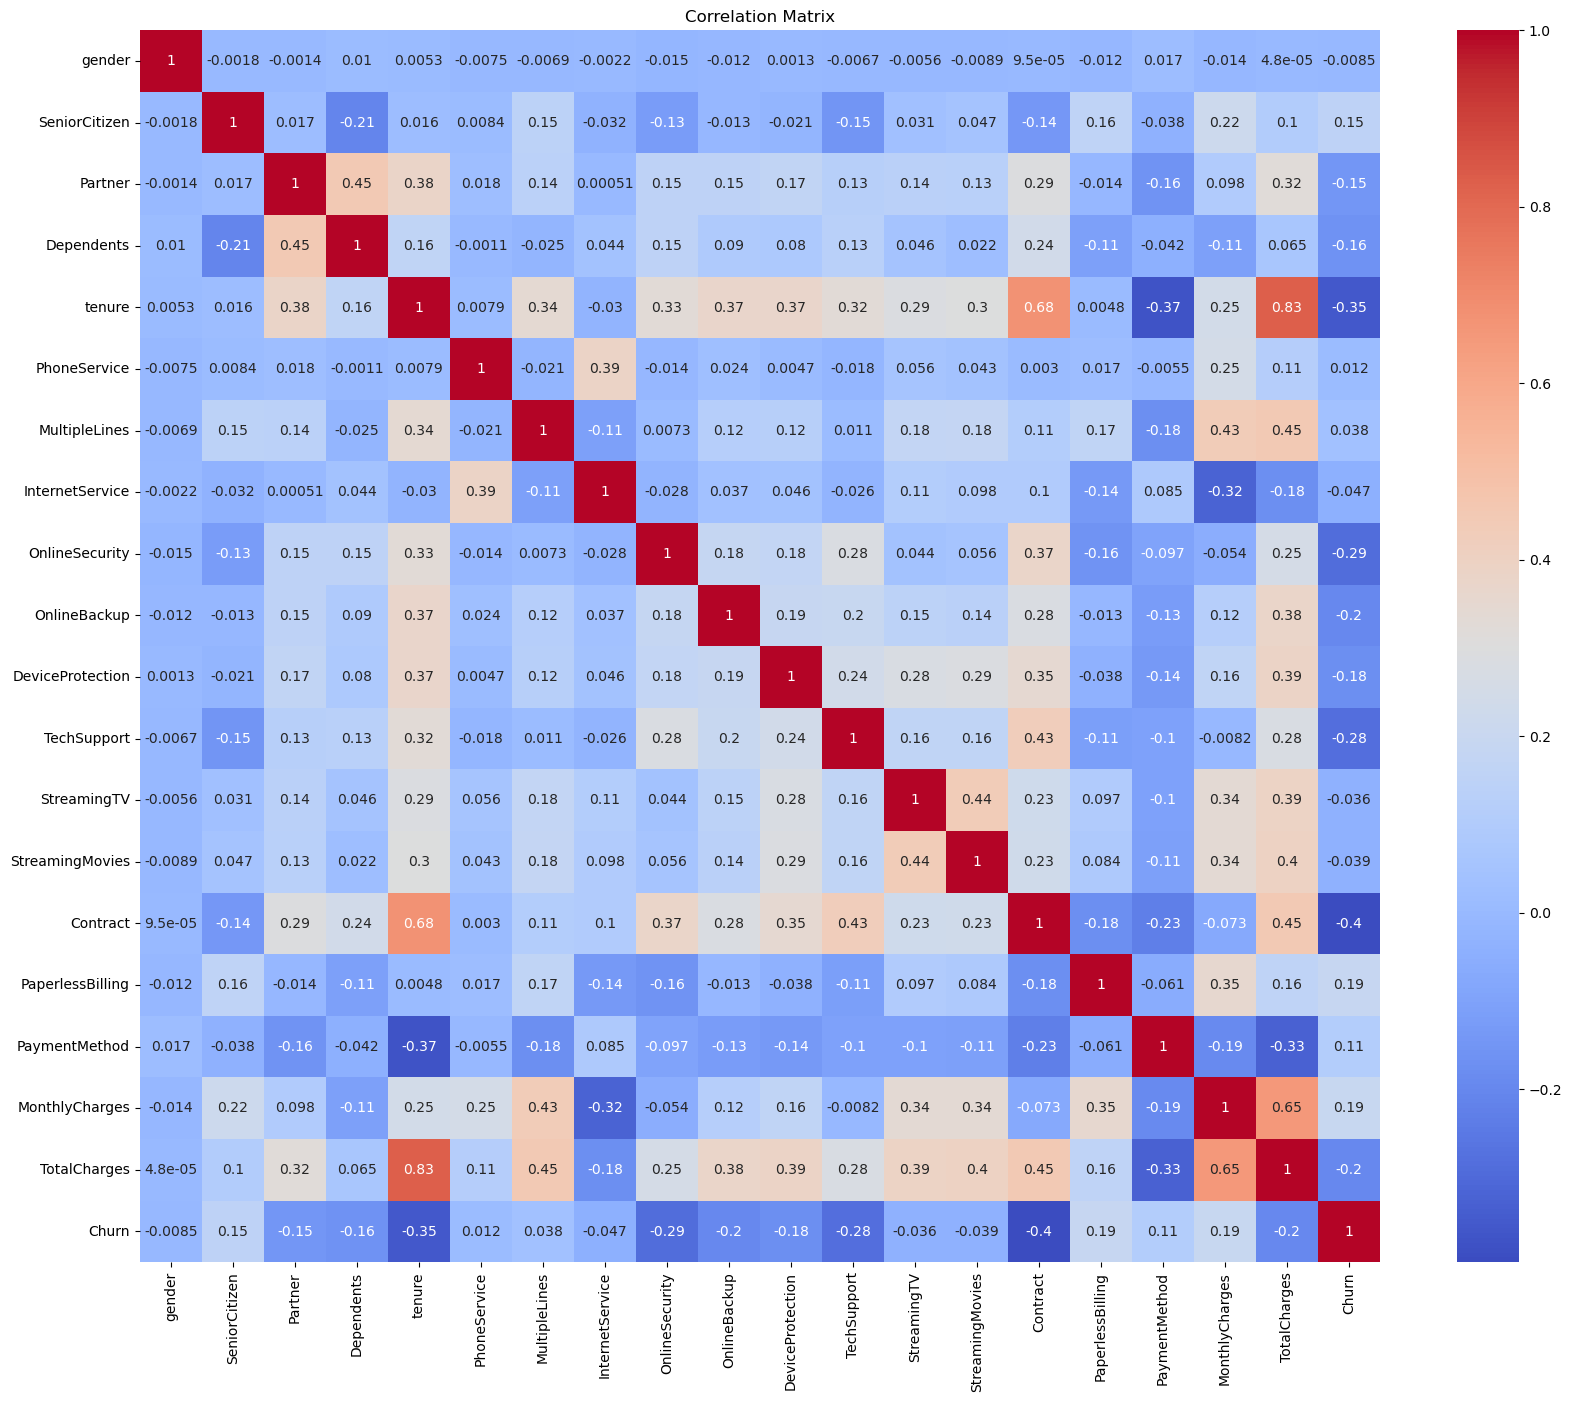

In [6]:
# Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

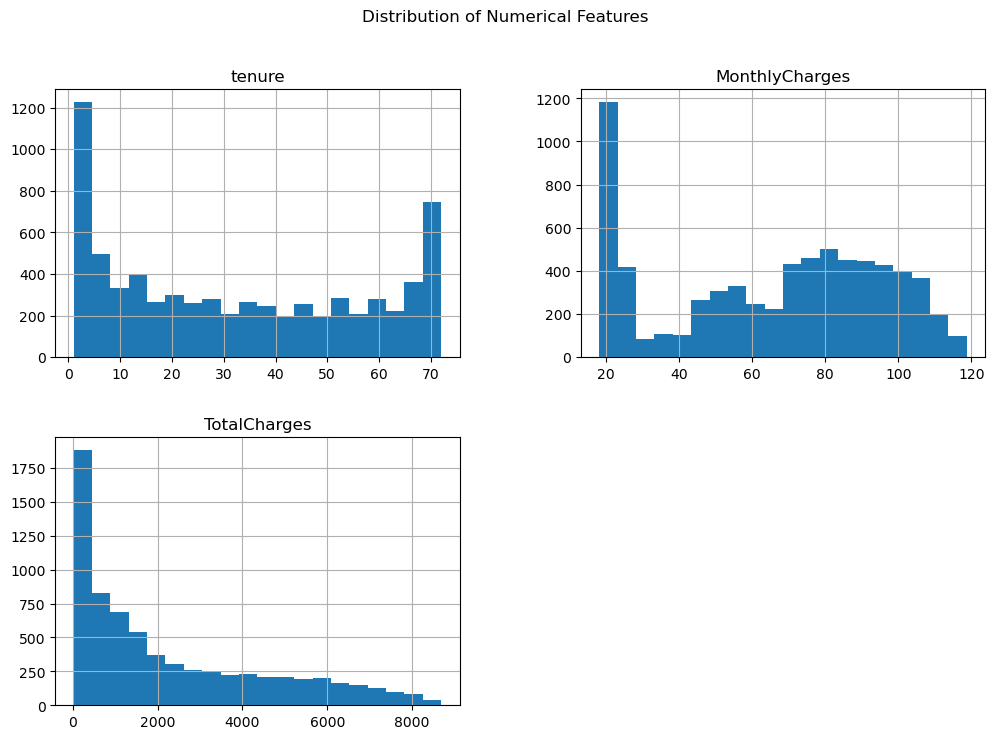

In [7]:
# Distribution of Numerical Features
NumericalFeatures = ['tenure', 'MonthlyCharges', 'TotalCharges']
Data[NumericalFeatures].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

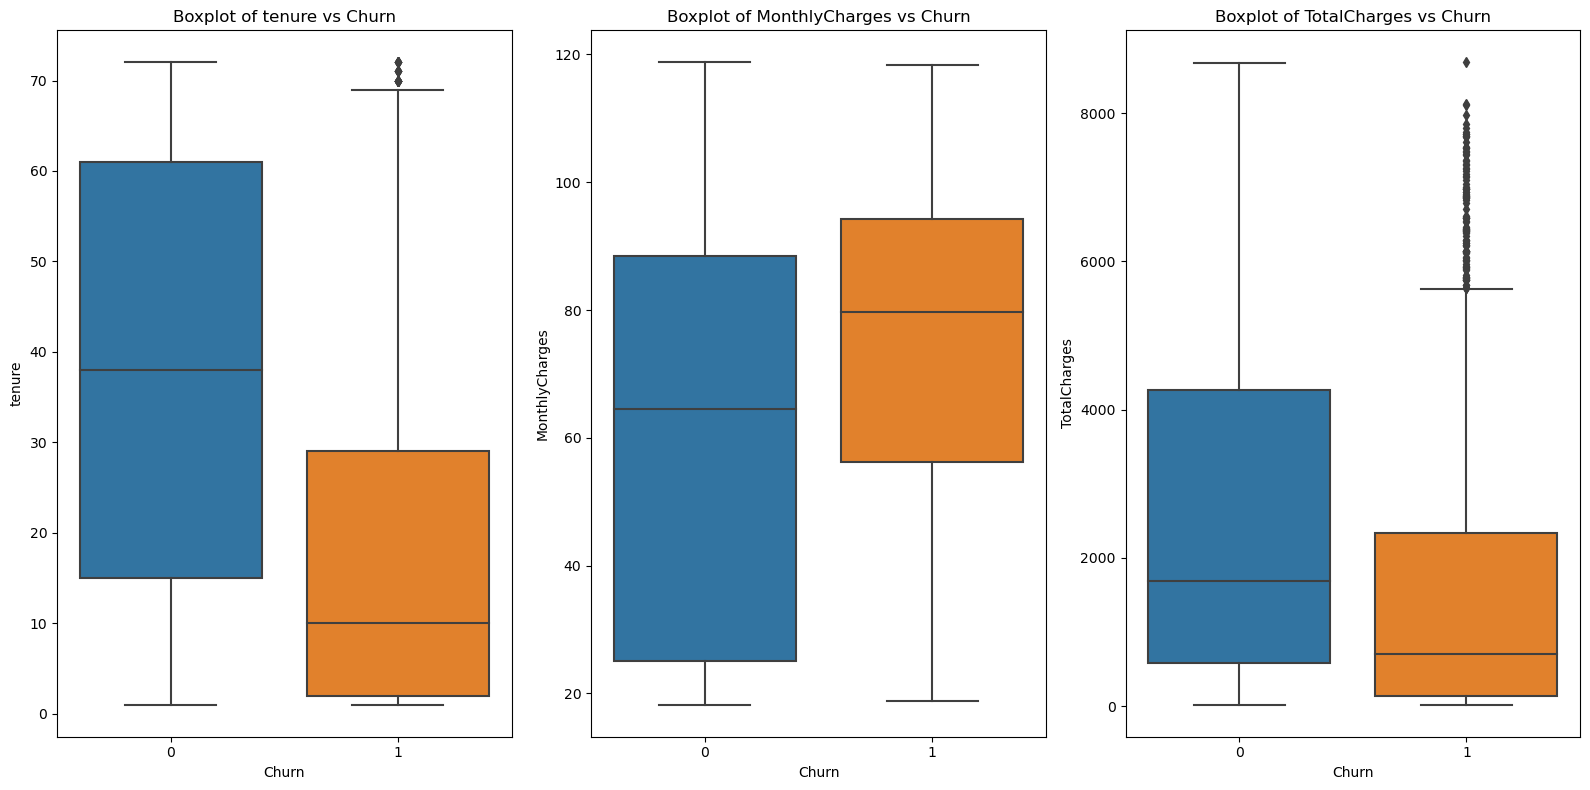

In [8]:
# Boxplots for Numerical Features vs. Churn
plt.figure(figsize=(16, 8))
for i, Feature in enumerate(NumericalFeatures):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=Feature, data=Data)
    plt.title(f'Boxplot of {Feature} vs Churn')
plt.tight_layout()
plt.show()

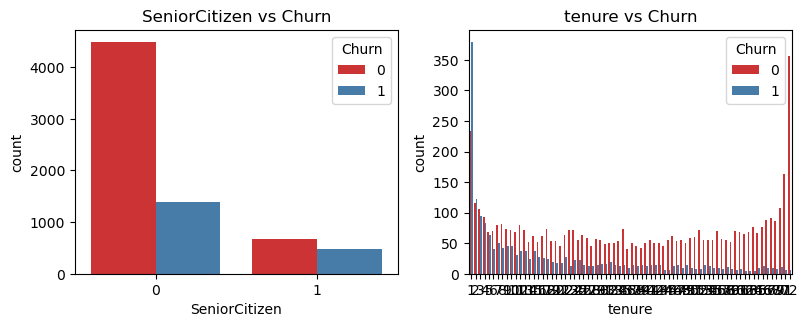

In [9]:
# Analysis of Categorical Variables
CategoricalFeatures = Data.select_dtypes(include=['int64']).columns.difference(['Churn'])

plt.figure(figsize=(16, 12))
for i, Feature in enumerate(CategoricalFeatures):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=Feature, hue='Churn', data=Data, palette='Set1')
    plt.title(f'{Feature} vs Churn')
plt.tight_layout()
plt.show()

In [10]:
# conditional probability of churn given that InternetService is Fiber optic
conditional_prob = Data[Data['InternetService'] == 2]['Churn'].mean()  # Assuming Fiber optic is encoded as 2
print(f"Conditional Probability of Churn given InternetService = Fiber optic: {conditional_prob:.4f}")

Conditional Probability of Churn given InternetService = Fiber optic: 0.0743


In [11]:
# Hypothesis Testing,Chi-square Test of Independence, test the association between Contract and Churn

contingency_table = pd.crosstab(Data['Contract'], Data['Churn'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant association between Contract and Churn.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Contract and Churn.")


Chi-square Statistic: 1179.5458
P-value: 0.0000
Reject the null hypothesis: There is a significant association between Contract and Churn.


In [12]:
# Split Data into Training and Testing Sets
X = Data.drop('Churn', axis=1)
Y = Data['Churn']
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Standardize Numerical Features
Scaler = StandardScaler()
XTrain = Scaler.fit_transform(XTrain)
XTest = Scaler.transform(XTest)

In [14]:
# Define Models
Models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
}

Model: Logistic Regression
Accuracy: 0.7854
Precision: 0.6208
Recall: 0.4947
F1-Score: 0.5506
ROC AUC: 0.8307


Model: Decision Tree
Accuracy: 0.7285
Precision: 0.4899
Recall: 0.5214
F1-Score: 0.5052
ROC AUC: 0.6612


Model: Random Forest
Accuracy: 0.7846
Precision: 0.6272
Recall: 0.4679
F1-Score: 0.5360
ROC AUC: 0.8129


Model: SVM
Accuracy: 0.7910
Precision: 0.6527
Recall: 0.4572
F1-Score: 0.5377
ROC AUC: 0.7786


Model: Gradient Boosting
Accuracy: 0.7960
Precision: 0.6548
Recall: 0.4920
F1-Score: 0.5618
ROC AUC: 0.8357




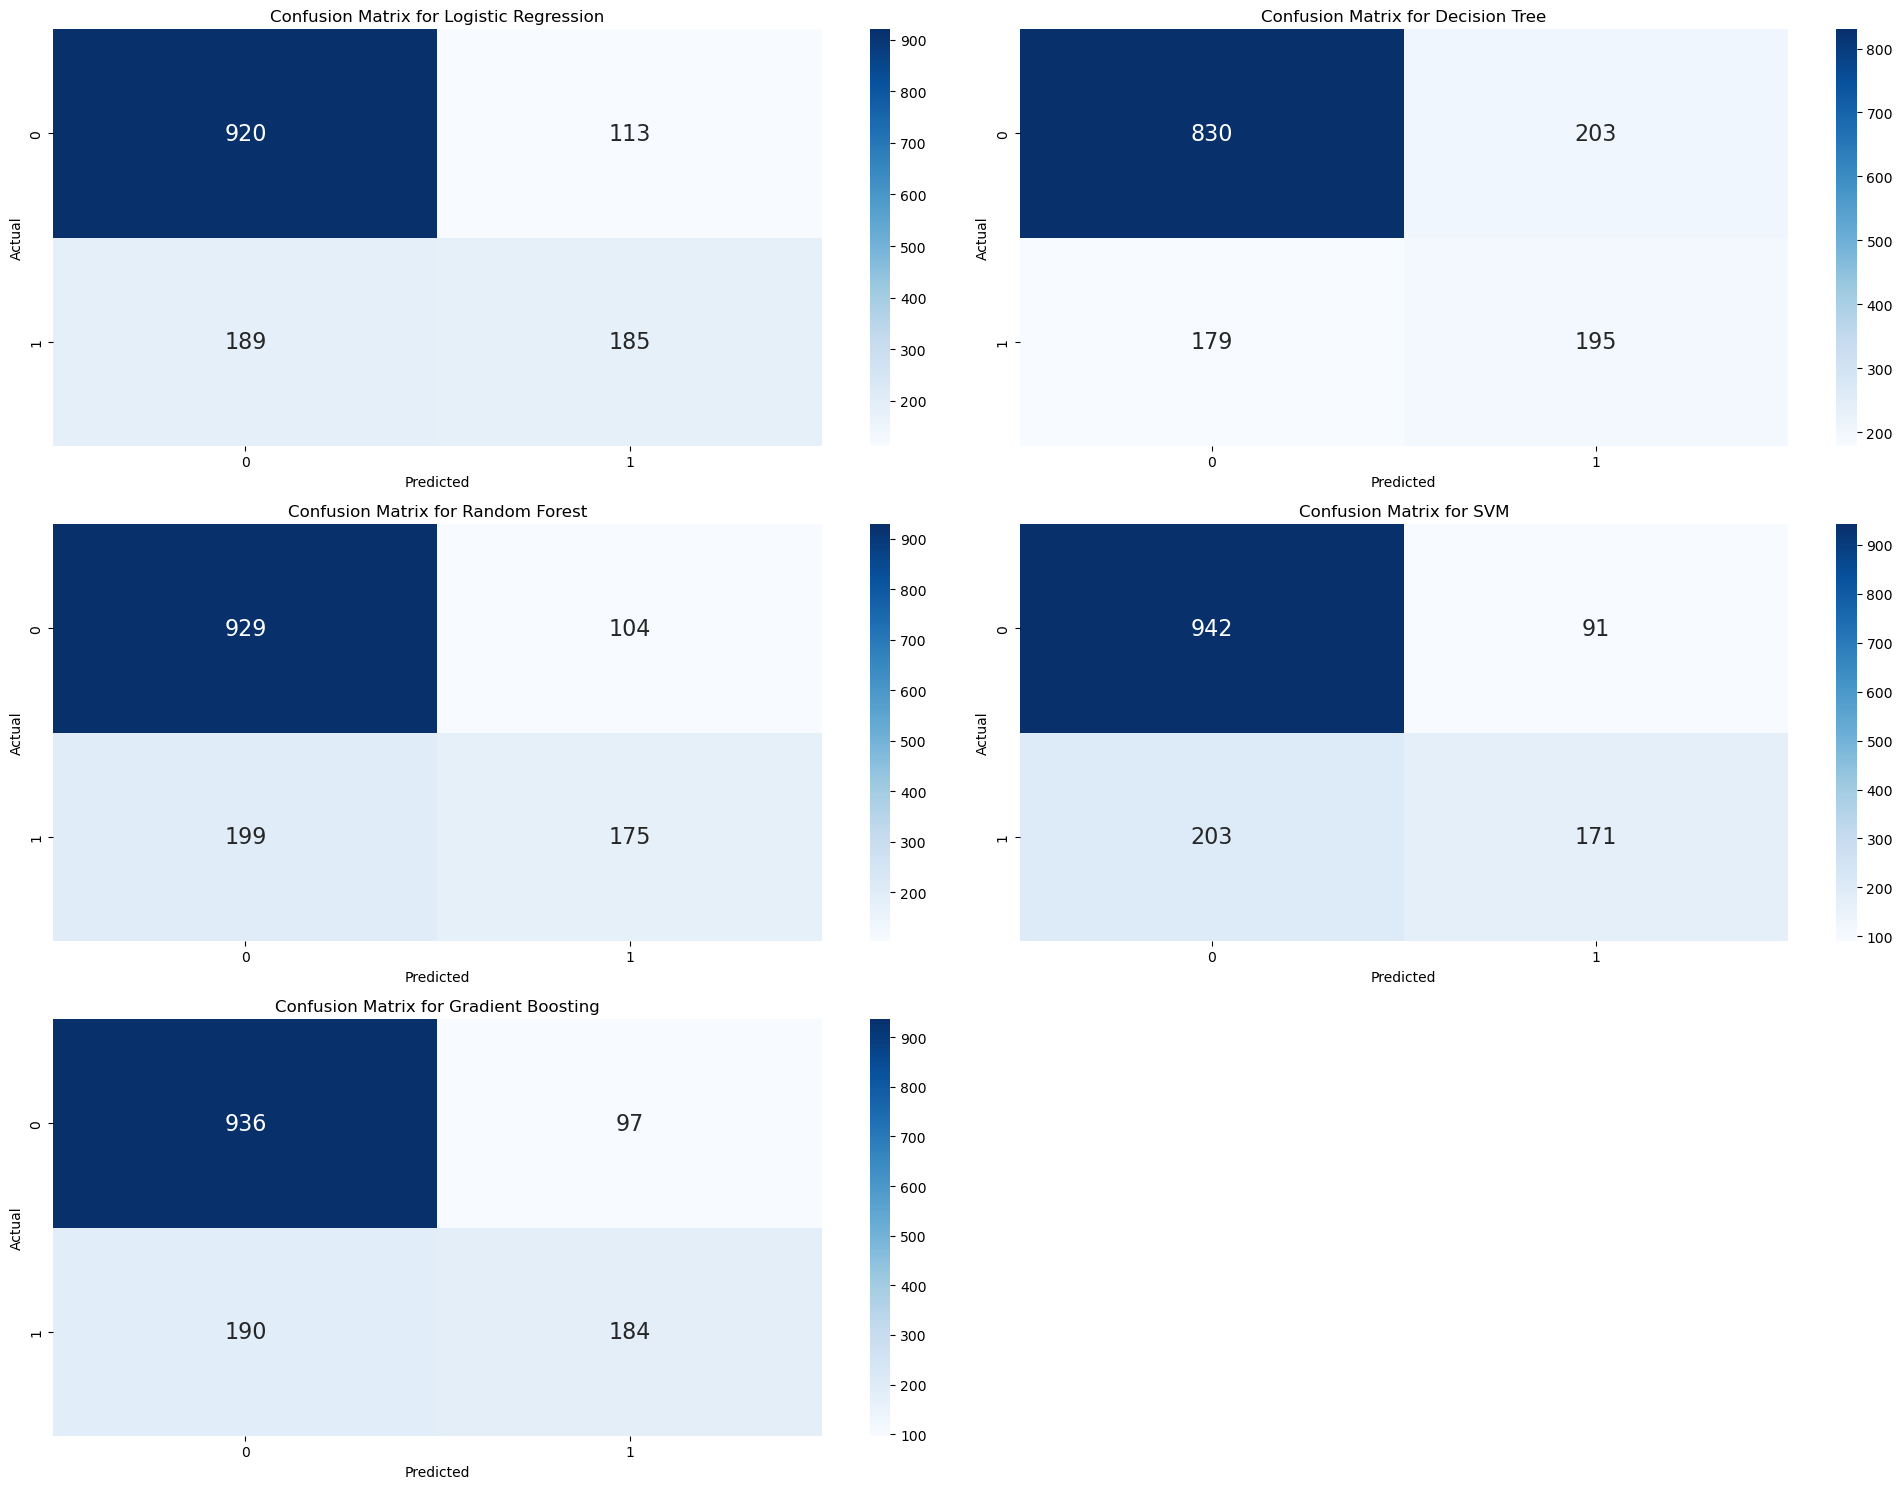

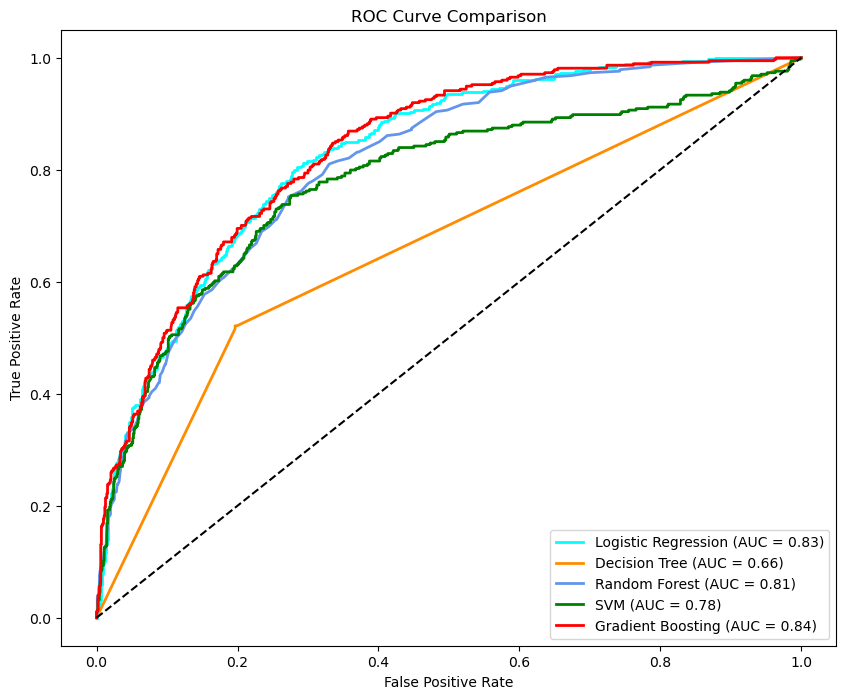

                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.785359   0.620805  0.494652  0.550595  0.830748
Decision Tree        0.728500   0.489950  0.521390  0.505181  0.661217
Random Forest        0.784648   0.627240  0.467914  0.535988  0.812878
SVM                  0.791045   0.652672  0.457219  0.537736  0.778585
Gradient Boosting    0.796020   0.654804  0.491979  0.561832  0.835704


In [15]:
# Train Models and Evaluate
Results = {}
plt.figure(figsize=(20, 15))
for i, (ModelName, Model) in enumerate(Models.items(), 1):
    Model.fit(XTrain, YTrain)
    YPred = Model.predict(XTest)
    YPredProba = Model.predict_proba(XTest)[:, 1]

    Accuracy = accuracy_score(YTest, YPred)
    Precision = precision_score(YTest, YPred)
    Recall = recall_score(YTest, YPred)
    F1 = f1_score(YTest, YPred)
    RocAuc = roc_auc_score(YTest, YPredProba)

    Results[ModelName] = {
        "accuracy": Accuracy,
        "precision": Precision,
        "recall": Recall,
        "f1": F1,
        "roc_auc": RocAuc
    }

    print(f"Model: {ModelName}")
    print(f"Accuracy: {Accuracy:.4f}")
    print(f"Precision: {Precision:.4f}")
    print(f"Recall: {Recall:.4f}")
    print(f"F1-Score: {F1:.4f}")
    print(f"ROC AUC: {RocAuc:.4f}")
    print("\n")

    # Plot Confusion Matrix
    Cm = confusion_matrix(YTest, YPred)
    plt.subplot(3, 2, i)
    sns.heatmap(Cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})  # Increase font size here
    plt.title(f'Confusion Matrix for {ModelName}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Final ROC Curve Plot for All Models
plt.figure(figsize=(10, 8))
Colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for (ModelName, Model), Color in zip(Models.items(), Colors):
    YPredProba = Model.predict_proba(XTest)[:, 1]
    Fpr, Tpr, _ = roc_curve(YTest, YPredProba)
    RocAuc = roc_auc_score(YTest, YPredProba)
    plt.plot(Fpr, Tpr, color=Color, lw=2, label=f'{ModelName} (AUC = {RocAuc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

# Summary of Results
ResultsDf = pd.DataFrame(Results).T
print(ResultsDf)
